# Using ta-lib abstract functions with mplchart

In [26]:
import pandas as pd
import yfinance as yf

import talib

from talib.abstract import Function

from mplchart.chart import Chart
from mplchart.primitives import Candlesticks


In [27]:
functions = [Function(name).info for name in talib.get_functions()]
functions = pd.DataFrame(functions).set_index("name")
functions

,group,display_name,function_flags,input_names,parameters,output_flags,output_names
name,,,,,,,
HT_DCPERIOD,Cycle Indicators,Hilbert Transform - Dominant Cycle Period,[Function has an unstable period],{'price': 'close'},{},{'real': ['Line']},[real]
HT_DCPHASE,Cycle Indicators,Hilbert Transform - Dominant Cycle Phase,[Function has an unstable period],{'price': 'close'},{},{'real': ['Line']},[real]
HT_PHASOR,Cycle Indicators,Hilbert Transform - Phasor Components,[Function has an unstable period],{'price': 'close'},{},"{'inphase': ['Line'], 'quadrature': ['Dashed L...","[inphase, quadrature]"
HT_SINE,Cycle Indicators,Hilbert Transform - SineWave,[Function has an unstable period],{'price': 'close'},{},"{'sine': ['Line'], 'leadsine': ['Dashed Line']}","[sine, leadsine]"
HT_TRENDMODE,Cycle Indicators,Hilbert Transform - Trend vs Cycle Mode,[Function has an unstable period],{'price': 'close'},{},{'integer': ['Line']},[integer]
...,...,...,...,...,...,...,...
NATR,Volatility Indicators,Normalized Average True Range,[Function has an unstable period],"{'prices': ['high', 'low', 'close']}",{'timeperiod': 14},{'real': ['Line']},[real]
TRANGE,Volatility Indicators,True Range,None,"{'prices': ['high', 'low', 'close']}",{},{'real': ['Line']},[real]
AD,Volume Indicators,Chaikin A/D Line,None,"{'prices': ['high', 'low', 'close', 'volume']}",{},{'real': ['Line']},[real]


In [28]:
ticker = "AAPL"
prices = yf.Ticker(ticker).history(period="5y")
prices = prices.rename(columns=str.lower).rename_axis(index=str.lower)
prices

,open,high,low,close,volume,dividends,stock splits
date,,,,,,,
2019-03-29 00:00:00-04:00,45.687284,45.747453,45.376811,45.716164,94256000,0.0,0.0
2019-04-01 00:00:00-04:00,46.122910,46.132536,45.338312,46.026642,111448000,0.0,0.0
2019-04-02 00:00:00-04:00,45.990527,46.801603,45.980901,46.695705,91062800,0.0,0.0
2019-04-03 00:00:00-04:00,46.510386,47.292579,46.486317,47.015804,93087200,0.0,0.0
2019-04-04 00:00:00-04:00,46.881024,47.261290,46.483912,47.097633,76457200,0.0,0.0
...,...,...,...,...,...,...,...
2024-03-22 00:00:00-04:00,171.759995,173.050003,170.059998,172.279999,71106600,0.0,0.0
2024-03-25 00:00:00-04:00,170.570007,171.940002,169.449997,170.850006,54288300,0.0,0.0
2024-03-26 00:00:00-04:00,170.000000,171.419998,169.580002,169.710007,57388400,0.0,0.0


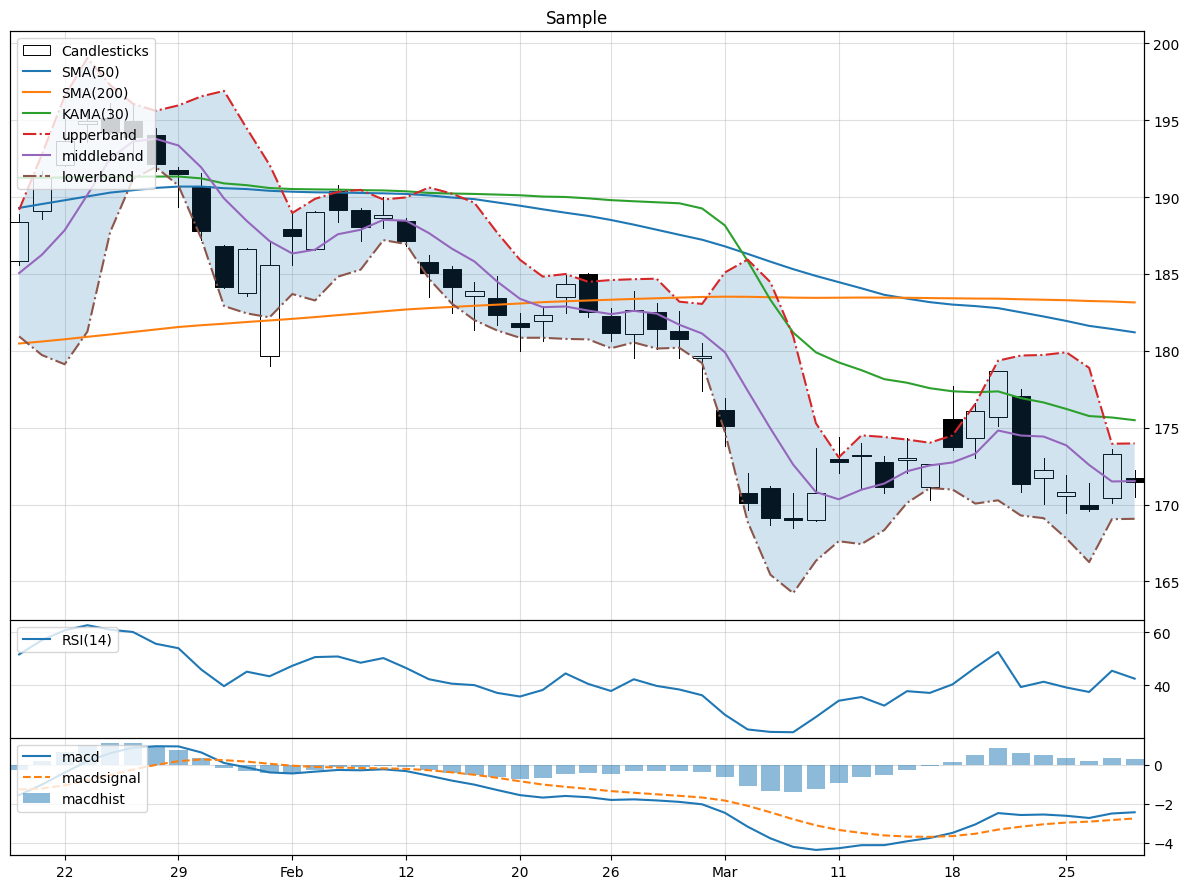

In [29]:
max_bars = 50
indicators = [
    Candlesticks(),
    Function("SMA", 50),
    Function("SMA", 200),
    Function("KAMA"),
    Function("BBANDS"),
    Function("RSI"),
    Function("MACD"),
]

chart = Chart(title="Sample", max_bars=max_bars)
chart.plot(prices, indicators)